In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
mu1 = np.array([[1,1]])
mu2 = np.array([[1.5, 1.5]])

sigma2 = np.array([
                [0.2, 0], 
                [0, 0.2]])

In [4]:
def p(x, mu, sigma2):
    '''
    We're taking the diagonal of the diagonal of the exponent of the exponent here.
    We do this as the output of this exponent would be a NxN sized matrix, where 
    N is the number of input points. We're only interested in the case of 
    (x_i - mu)@S^⁻1 @(x_i - mu).T, so therefore the diagonal. 
    '''
    
    exponent = -0.5 * (x - mu) @ np.linalg.inv(sigma2) @ (x - mu).T
    denominator = (2 * np.pi) ** (len(mu) / 2) * np.sqrt(np.linalg.det(sigma2))
    
    return np.diag(np.exp(exponent))/denominator

In [14]:
x, y = np.linspace(-0.5, 2.5, num=100), np.linspace(-0.5, 2.5, num=100)
XY = np.asarray(np.meshgrid(x,y)).reshape(2, -1).T 


p1 = p(XY, mu1, sigma2)
p2 = p(XY, mu2, sigma2)
print(XY.shape)
print(p([1,1], mu1, sigma2))

#Going of bayes decision rule, we assign a point x to class 1 if p1 > p2, and vice versa
pred = np.array([p1, p2])

(10000, 2)
[1.9947114]


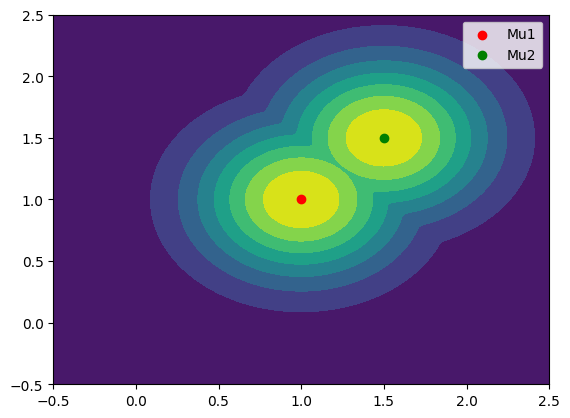

In [6]:
boundary = np.max(pred, axis=0).reshape(100,100)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.contourf(X, Y, boundary)
plt.scatter(mu1[0,0], mu1[0,1], c='r', label='Mu1')
plt.scatter(mu2[0,0], mu2[0,1], c='g', label='Mu2')
plt.legend()
plt.show()

(2, 10000)


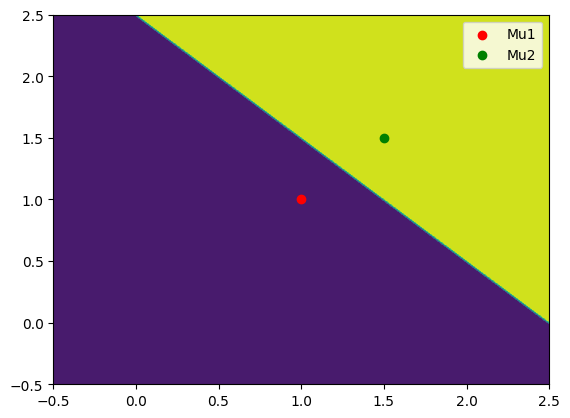

In [7]:
print(pred.shape)
boundary = np.argmax(pred, axis=0).reshape(100,100)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.contourf(X, Y, boundary)
plt.scatter(mu1[0,0], mu1[0,1], c='r', label='Mu1')
plt.scatter(mu2[0,0], mu2[0,1], c='g', label='Mu2')
plt.legend()
plt.show()

Solutions for task 2.12b

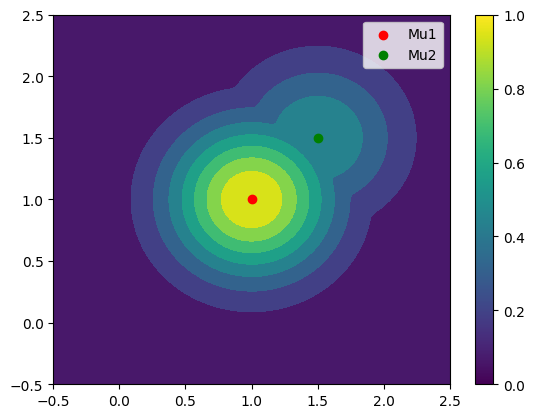

In [8]:
L = np.array([
    [0, 1],
    [0.5, 0]])

#Going of eq 2.20, we can take into account the risk by multiplying a factor to our already calculated likelihoods
risk_factor = L[0,1]/L[1,0]

pred = np.array([p1*risk_factor, p2])
boundary = np.max(pred, axis=0).reshape(100,100)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.contourf(X, Y, boundary)
plt.scatter(mu1[0,0], mu1[0,1], c='r', label='Mu1')
plt.scatter(mu2[0,0], mu2[0,1], c='g', label='Mu2')
plt.colorbar()
plt.legend()
plt.show()

(2, 10000)


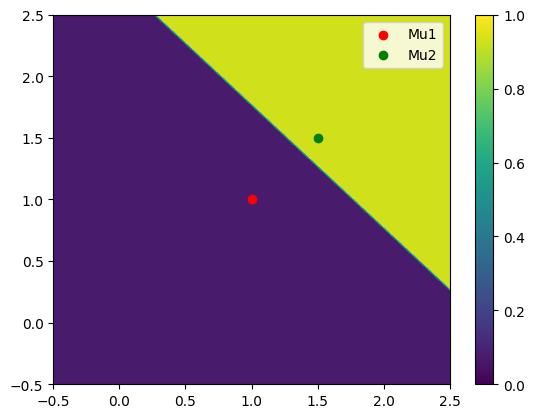

In [9]:
print(pred.shape)
boundary = np.argmax(pred, axis=0).reshape(100,100)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.contourf(X, Y, boundary)
plt.scatter(mu1[0,0], mu1[0,1], c='r', label='Mu1')
plt.scatter(mu2[0,0], mu2[0,1], c='g', label='Mu2')
plt.colorbar()
plt.legend()
plt.show()

Make random samples, and classify

In [10]:
X1 = np.random.multivariate_normal(mean=mu1.flatten(), cov=sigma2, size=(100))
X2 = np.random.multivariate_normal(mean=mu2.flatten(), cov=sigma2, size=(100))

Y1 = np.zeros(100)
Y2 = np.ones(100)
risk_factor = L[0,1]/L[1,0]

X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)
p1, p2 = p(X, mu1, sigma2), p(X, mu2, sigma2)
pred = np.array([p1, p2])
pred = np.argmax(pred, axis=0)

accuracy = np.sum(pred == Y)/len(pred)

print(f'The accuracy of our model is {accuracy}')

The accuracy of our model is 0.85


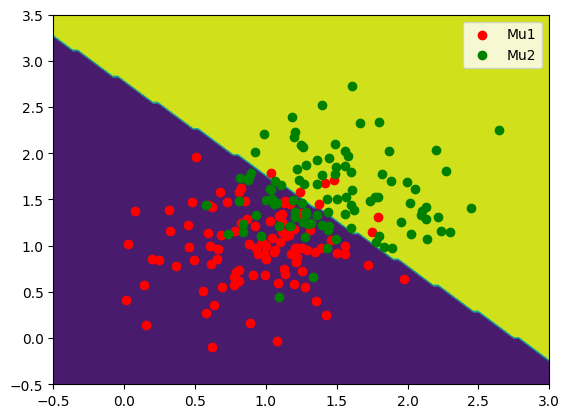

In [11]:
x, y = np.linspace(-0.5, 3.0, num=100), np.linspace(-0.5, 3.5, num=100)
XY = np.asarray(np.meshgrid(x,y)).reshape(2, -1).T 

p1 = p(XY, mu1, sigma2).reshape(100,100)
p2 = p(XY, mu2, sigma2).reshape(100,100)

#Going of bayes decision rule, we assign a point x to class 1 if p1 > p2, and vice versa
pred = np.array([p1*risk_factor, p2])
boundary = np.argmax(pred, axis=0)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.contourf(X, Y, boundary)

plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='g')

plt.scatter(mu1[0,0], mu1[0,1], c='r', label='Mu1')
plt.scatter(mu2[0,0], mu2[0,1], c='g', label='Mu2')
plt.legend()
plt.show()

In [12]:
mu2 = np.array([[3.0, 3.0]])

X1 = np.random.multivariate_normal(mean=mu1.flatten(), cov=sigma2, size=(100))
X2 = np.random.multivariate_normal(mean=mu2.flatten(), cov=sigma2, size=(100))
Y1 = np.zeros(100)
Y2 = np.ones(100)
risk_factor = L[0,1]/L[1,0]

X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)
p1, p2 = p(X, mu1, sigma2), p(X, mu2, sigma2)
pred = np.array([p1*risk_factor, p2])
pred = np.argmax(pred, axis=0)

accuracy = np.sum(pred == Y)/len(pred)

print(f'The accuracy of our model is {accuracy}')



The accuracy of our model is 1.0


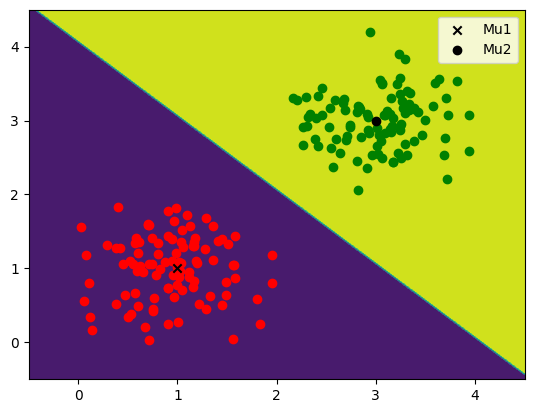

In [13]:
x, y = np.linspace(-0.5, 4.5, num=100), np.linspace(-0.5, 4.5, num=100)
XY = np.asarray(np.meshgrid(x,y)).reshape(2, -1).T 

p1 = p(XY, mu1, sigma2).reshape(100,100)
p2 = p(XY, mu2, sigma2).reshape(100,100)

#Going of bayes decision rule, we assign a point x to class 1 if p1 > p2, and vice versa
pred = np.array([p1*risk_factor, p2])
boundary = np.argmax(pred, axis=0)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.contourf(X, Y, boundary)

plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='g')

plt.scatter(mu1[0,0], mu1[0,1], c='k', marker='x', label='Mu1')
plt.scatter(mu2[0,0], mu2[0,1], c='k', marker='o', label='Mu2')
plt.legend()
plt.show()